Τελική Εργασία
ΕΔΔΕ2 "Ανάλυση Μεγάλων Δεδομένων μέσω της Γλώσσας Python"
Στo πλαίσιo της τελικής εργασίας σας, ζητείται να αναλύσετε ένα μεγάλο αριθμό δεδομένων
(N>500) τα οποία αναφέρονται σε ένα ελληνικό θέμα και συγκεκριμένα στην ελληνική
ειδησεογραφία με θέμα την Covid-19, με το σύνολο (ή ένα μέρος) των δεδομένων να έχουν
εξορυχθεί από το διαδίκτυο με τεχνικές scraping (Beautiful Soup). Μπορείτε επίσης να
συγκεντρώσετε για την ίδια χρονική περίοδο tweets (και με χρήση workbench). Για την ανάλυση
των δεδομένων σας θα πρέπει να κάνετε τα παρακάτω βήματα επεξεργασίας:
1. Να εξορύξετε τα δεδομένα σας με χρήση των παραπάνω τεχνικών.
2. Τα δεδομένα θα πρέπει να εισαχθούν στην Python σε μορφή dataframe
3. Να κάνετε καθαρισμό των δεδομένων από άχρηστα στοιχεία, NaN values, περιττά κείμενα
και επιπλέον στήλες.
4. Αν απαιτείται, μπορείτε να τα επεξεργαστείτε κατάλληλα (αφαίρεση stopwords,
stemming/lemmatization)
5. Να δημιουργήσετε νέες παραμέτρους ως στήλες στο dataframe όπως o μήνας, ο χρόνος,
ένα ποσοστό κ.λπ.
6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα
αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα
δεδομένα σας.
7. Μπορείτε να δημιουργήσετε διάφορα γραφήματα από τα κείμενά σας όπως (α) ένα
wordcloud, (β) ένα διάγραμμα με τις 15 πιο συχνές λέξεις και (γ) ένα διάγραμμα με τα πιο
συχνά διγράμματα (bigrams).
8. Χρησιμοποιήστε το πεδίο της ημερομηνίας ως index στο dataframe που θα δημιουργήσετε
ώστε να αξιοποιήσετε τις λειτουργίες της χρονοσειράς (resample()).
9. Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την
πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα
σε νέες στήλες στο dataframe των δεδομένων σας.
10. Δημιουργήστε γραφήματα ομαδοποιώντας μέσω του resample() την πολικότητα των
άρθρων σας ανά ημέρα/μήνα/3μηνο/έτος ανάλογα με το θέμα.
11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της
ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που
έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου
heatmap.
12. Ανεβάστε τα γραφήματα που κατασκευάσατε στο site: http://helios.media.uoa.gr/datajour/
φτιάχνοντας μια ιστορία (τουλάχιστον 800 λέξεις), αναφέροντας το όνομά σας. Βελτιώστε
όπου είναι δυνατόν την ποιότητα των γραφημάτων μέσω προγραμμάτων όπως το flourish,
datawrapper κ.λπ.
13. Ο κώδικάς σας μαζί με τα δεδομένα θα ανέβει στον προσωπικό σας λογαριασμό στο github
(αν τα δεδομένα υπερβαίνουν το όριο, βάλτε απλά ένα δείγμα ώστε να τρέχει ο κώδικας).
14. Το άρθρο σας σε μορφή pdf με τίτλο Eponimo_teliki_ergasia.zip μαζί με το link για τον
κώδικα (github) θα ανέβει στο eclass.
Η εργασία έχει τελική ημερομηνία παράδοσης: 7/7/2021

Twitter

In [142]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "f6vVvVygpV5xnkTPm9eicXBEf"
CONSUMER_SECRET = "5AHPBg3Pd6cl8Vvj1iV91WHB9ZEQHOYtP5t8q3Bcxnl8VMbuxP"
OAUTH_TOKEN = "1350906426806439936-GKk0wQVM13CAhR1XxBX0nbus4u2vZm"
OAUTH_TOKEN_SECRET = "2nE3HFcPwIzvqvaBCEuGum9smxVYKAK0gkGpFMNTwCTjE"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [143]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='@Kathimerini_gr',count=200, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    tweetsL.append(tweet)

I Got: 200  tweets


In [144]:
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='@Kathimerini_gr',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        tweetsL.append(tweet)
print("I got :", len(tweetsL), " in total!!!")

I Got: 100  tweets more... Last ID: 1412741747835293705
I Got: 100  tweets more... Last ID: 1412323223623061504
I Got: 100  tweets more... Last ID: 1411917032887623679
I Got: 100  tweets more... Last ID: 1411422889748975616
I Got: 100  tweets more... Last ID: 1410927731026628611
I Got: 100  tweets more... Last ID: 1410551503522340863
I Got: 100  tweets more... Last ID: 1410158223026495491
I Got: 100  tweets more... Last ID: 1409788741141549056
I Got: 100  tweets more... Last ID: 1409414983042191359
I Got: 100  tweets more... Last ID: 1408672362300686338
I Got: 100  tweets more... Last ID: 1408075893201903620
I Got: 100  tweets more... Last ID: 1407630191371993087
I Got: 100  tweets more... Last ID: 1407055515243401217
I Got: 100  tweets more... Last ID: 1406521355118522367
I Got: 100  tweets more... Last ID: 1405821607222910979
I Got: 100  tweets more... Last ID: 1405451415863107583
I Got: 100  tweets more... Last ID: 1405080924279263231
I Got: 100  tweets more... Last ID: 140469335316

In [145]:
len(tweetsL)

3250

In [146]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Wed Jul 07 07:10:03 +0000 2021 Απόστολος Λακασάς: Αντιγραφές εξ αποστάσεως https://t.co/yQ65dmjqrd #kathimerini #καθημερινη
Wed Jul 07 06:54:45 +0000 2021 Θεσσαλονίκη: Επεισόδιο σε δομή προσφύγων και μεταναστών – Δύο τραυματίες και μια σύλληψη
 https://t.co/4mipn6J4tT
Wed Jul 07 06:47:24 +0000 2021 Όλυμπος: Τρίτη μέρα ερευνών για τον 35χρονο ορειβάτη
 https://t.co/NwZdPSOZau
Wed Jul 07 06:39:23 +0000 2021 Βρετανία: Οι αεροπορικές εταιρίες θα ελέγχουν τις καταστάσεις εμβολιασμένων στις πτήσεις
#καθημερινη #kathimerini
https://t.co/W9oa37tYSH
Wed Jul 07 06:37:32 +0000 2021 Γώγος: Αναγκαίος ο εμβολιασμός στην εστίαση
 https://t.co/BKeKivFwK3
Wed Jul 07 06:29:43 +0000 2021 Ο εφιάλτης της ανήλικης από τη Ρουμανία στα δίχτυα μαστροπών https://t.co/Rh9Gwy9tQ7 #kathimerini #καθημερινη
Wed Jul 07 06:02:42 +0000 2021 Καλλιθέα: Ζευγάρι εντοπίστηκε νεκρό σε διαμέρισμα – Σε προχωρημένη σήψη οι σοροί
 https://t.co/VeKUXvMS8f
Wed Jul 07 05:58:29 

In [147]:
tweetsL[0]['full_text']

'Το https://t.co/NqkzAcWuQQ θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n https://t.co/xexS62Y51d'

In [148]:
tweetsL[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jul 11 19:10:02 +0000 2021',
 'display_text_range': [0, 114],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'kathimerini.gr',
    'expanded_url': 'http://kathimerini.gr',
    'indices': [3, 26],
    'url': 'https://t.co/NqkzAcWuQQ'},
   {'display_url': 'kathimerini.gr/athletics/5614…',
    'expanded_url': 'https://www.kathimerini.gr/athletics/561430090/euro-2020-telikos-agglia-italia/',
    'indices': [91, 114],
    'url': 'https://t.co/xexS62Y51d'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Το https://t.co/NqkzAcWuQQ θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n https://t.co/xexS62Y51d',
 'geo': None,
 'id': 1414300970188685315,
 'id_str': '1414300970188685315',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quot

In [149]:
tweets_df = pd.DataFrame(tweetsL)

In [150]:
tweets_df.head()

created_at                   id               id_str  \
0  Sun Jul 11 19:10:02 +0000 2021  1414300970188685315  1414300970188685315   
1  Sun Jul 11 19:00:39 +0000 2021  1414298607222763535  1414298607222763535   
2  Sun Jul 11 18:29:52 +0000 2021  1414290860674633729  1414290860674633729   
3  Sun Jul 11 18:15:03 +0000 2021  1414287135549661185  1414287135549661185   
4  Sun Jul 11 17:50:01 +0000 2021  1414280835314982913  1414280835314982913   

                                           full_text  truncated  \
0  Το https://t.co/NqkzAcWuQQ θα παρακολουθήσει τ...      False   
1  Αλέξης Παπαχελάς: Ο νέος ψυχρός πόλεμος\n\n ht...      False   
2  Κύριο Άρθρο: Ώρα για λύσεις\n\n https://t.co/2...      False   
3  Μείζον εθνικό ζήτημα είναι η επίσπευση του εμβ...      False   
4  Η Αγγλία αγωνίζεται για το πρώτο τρόπαιο Εuro ...      False   

  display_text_range                                           entities  \
0           [0, 114]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1            [0, 65]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2            [0, 53]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3           [0, 193]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 116]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                              source in_reply_to_status_id  \
0  <a href="https://www.hootsuite.com" rel="nofol...                  None   
1  <a href="https://www.hootsuite.com" rel="nofol...                  None   
2  <a href="https://www.hootsuite.com" rel="nofol...                  None   
3  <a href="https://www.hootsuite.com" rel="nofol...                  None   
4  <a href="https://www.hootsuite.com" rel="nofol...                  None   

  in_reply_to_status_id_str in_reply_to_user_id in_reply_to_user_id_str  \
0                      None                None                    None   
1                      None                None                    None   
2                      None                None                    None   
3                      None                None                    None   
4                      None                None                    None   

  in_reply_to_screen_name                                               user  \
0                    None  {'id': 186060772, 'id_str': '186060772', 'name...   
1                    None  {'id': 186060772, 'id_str': '186060772', 'name...   
2                    None  {'id': 186060772, 'id_str': '186060772', 'name...   
3                    None  {'id': 186060772, 'id_str': '186060772', 'name...   
4                    None  {'id': 186060772, 'id_str': '186060772', 'name...   

    geo coordinates place contributors  is_quote_status  retweet_count  \
0  None        None  None         None            False              0   
1  None        None  None         None            False              0   
2  None        None  None         None            False              0   
3  None        None  None         None            False              0   
4  None        None  None         None            False              1   

   favorite_count  favorited  retweeted possibly_sensitive lang  \
0               0      False      False              False   el   
1               1      False      False              False   el   
2               3      False      False              False   el   
3               4      False      False              False   el   
4               9      False      False              False   el   

  extended_entities  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [151]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [152]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/KathimeriniTweets.tsv", sep='\t')

In [153]:
import pandas as pd
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/KathimeriniTweets.tsv", sep="\t")
data


Unnamed: 0                      created_at                   id  \
0              0  Sun Jul 11 19:10:02 +0000 2021  1414300970188685315   
1              1  Sun Jul 11 19:00:39 +0000 2021  1414298607222763535   
2              2  Sun Jul 11 18:29:52 +0000 2021  1414290860674633729   
3              3  Sun Jul 11 18:15:03 +0000 2021  1414287135549661185   
4              4  Sun Jul 11 17:50:01 +0000 2021  1414280835314982913   
...          ...                             ...                  ...   
3245        3245  Sun May 30 06:15:02 +0000 2021  1398885646643744768   
3246        3246  Sun May 30 05:57:11 +0000 2021  1398881151247339522   
3247        3247  Sun May 30 05:27:06 +0000 2021  1398873584068665344   
3248        3248  Sun May 30 05:13:06 +0000 2021  1398870061205573637   
3249        3249  Sat May 29 22:00:28 +0000 2021  1398761184942247939   

                   id_str                                          full_text  \
0     1414300970188685315  Το https://t.co/NqkzAcWuQQ θα παρακολουθήσει τ...   
1     1414298607222763535  Αλέξης Παπαχελάς: Ο νέος ψυχρός πόλεμος\n\n ht...   
2     1414290860674633729  Κύριο Άρθρο: Ώρα για λύσεις\n\n https://t.co/2...   
3     1414287135549661185  Μείζον εθνικό ζήτημα είναι η επίσπευση του εμβ...   
4     1414280835314982913  Η Αγγλία αγωνίζεται για το πρώτο τρόπαιο Εuro ...   
...                   ...                                                ...   
3245  1398885646643744768  Το έδειξε μελέτη του Ινστιτούτου Παστέρ στο Πα...   
3246  1398881151247339522  Σάκης Μουμτζής: Κακώς διαμαρτύρονται  https://...   
3247  1398873584068665344  Το Podcast του Σταύρου Θεοδωράκη: Ωχαδελφιστές...   
3248  1398870061205573637  Τα ρίσκα και οι προσδοκίες της επίσκεψης Τσαβο...   
3249  1398761184942247939  Σταύρος Παπαντωνίου: Θεωρείο (29/05/21) https:...   

      truncated display_text_range  \
0         False           [0, 114]   
1         False            [0, 65]   
2         False            [0, 53]   
3         False           [0, 193]   
4         False           [0, 116]   
...         ...                ...   
3245      False           [0, 187]   
3246      False            [0, 61]   
3247      False           [0, 109]   
3248      False            [0, 78]   
3249      False            [0, 63]   

                                               entities  \
0     {'hashtags': [], 'symbols': [], 'user_mentions...   
1     {'hashtags': [], 'symbols': [], 'user_mentions...   
2     {'hashtags': [], 'symbols': [], 'user_mentions...   
3     {'hashtags': [], 'symbols': [], 'user_mentions...   
4     {'hashtags': [], 'symbols': [], 'user_mentions...   
...                                                 ...   
3245  {'hashtags': [], 'symbols': [], 'user_mentions...   
3246  {'hashtags': [], 'symbols': [], 'user_mentions...   
3247  {'hashtags': [], 'symbols': [], 'user_mentions...   
3248  {'hashtags': [], 'symbols': [], 'user_mentions...   
3249  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                 source  \
0     <a href="https://www.hootsuite.com" rel="nofol...   
1     <a href="https://www.hootsuite.com" rel="nofol...   
2     <a href="https://www.hootsuite.com" rel="nofol...   
3     <a href="https://www.hootsuite.com" rel="nofol...   
4     <a href="https://www.hootsuite.com" rel="nofol...   
...                                                 ...   
3245  <a href="https://www.hootsuite.com" rel="nofol...   
3246  <a href="https://www.hootsuite.com" rel="nofol...   
3247  <a href="https://www.hootsuite.com" rel="nofol...   
3248  <a href="https://www.hootsuite.com" rel="nofol...   
3249  <a href="https://www.hootsuite.com" rel="nofol...   

      in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                       NaN                        NaN                  NaN   
1                       NaN                        NaN                  NaN   
2                       NaN                        NaN  

In [154]:
def load_tweets():
    return pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/KathimeriniTweets.tsv", delimiter="\t")

data = load_tweets()
tweets = data["full_text"]
print(tweets)


0       Το https://t.co/NqkzAcWuQQ θα παρακολουθήσει τ...
1       Αλέξης Παπαχελάς: Ο νέος ψυχρός πόλεμος\n\n ht...
2       Κύριο Άρθρο: Ώρα για λύσεις\n\n https://t.co/2...
3       Μείζον εθνικό ζήτημα είναι η επίσπευση του εμβ...
4       Η Αγγλία αγωνίζεται για το πρώτο τρόπαιο Εuro ...
                              ...                        
3245    Το έδειξε μελέτη του Ινστιτούτου Παστέρ στο Πα...
3246    Σάκης Μουμτζής: Κακώς διαμαρτύρονται  https://...
3247    Το Podcast του Σταύρου Θεοδωράκη: Ωχαδελφιστές...
3248    Τα ρίσκα και οι προσδοκίες της επίσκεψης Τσαβο...
3249    Σταύρος Παπαντωνίου: Θεωρείο (29/05/21) https:...
Name: full_text, Length: 3250, dtype: object


In [155]:
tweets_lower = list(map(lambda x:x.lower(),tweets))
print (tweets_lower)

['το https://t.co/nqkzacwuqq θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n https://t.co/xexs62y51d', 'αλέξης παπαχελάς: ο νέος ψυχρός πόλεμος\n\n https://t.co/iblztvwmml', 'κύριο άρθρο: ώρα για λύσεις\n\n https://t.co/21ypcd0z2k', 'μείζον εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο https://t.co/nqkzacwuqq ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς. https://t.co/afdlvl1j18', 'η αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία  https://t.co/hzmeho3ila', 'σκίτσο του ηλία μακρή (11/07/21)\n\n https://t.co/akgjrsofva', 'σκίτσο του δημήτρη χαντζόπουλου (11/07/21)\n\n https://t.co/2zhywvmcdj', 'σκίτσο του ανδρέα πετρουλάκη (11/07/21)\n\n https://t.co/v86ym39wkc', 'νωρίτερα από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19. https://t.co/hkyxqck7zo', 'ο δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και

In [156]:
#diagrafi ReTweet 
import re

tweets_as_string = ''.join(tweets_lower)

rt_regex = re.sub('rt @', " ", tweets_as_string)
rt_regex

'το https://t.co/nqkzacwuqq θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n https://t.co/xexs62y51dαλέξης παπαχελάς: ο νέος ψυχρός πόλεμος\n\n https://t.co/iblztvwmmlκύριο άρθρο: ώρα για λύσεις\n\n https://t.co/21ypcd0z2kμείζον εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο https://t.co/nqkzacwuqq ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς. https://t.co/afdlvl1j18η αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία  https://t.co/hzmeho3ilaσκίτσο του ηλία μακρή (11/07/21)\n\n https://t.co/akgjrsofvaσκίτσο του δημήτρη χαντζόπουλου (11/07/21)\n\n https://t.co/2zhywvmcdjσκίτσο του ανδρέα πετρουλάκη (11/07/21)\n\n https://t.co/v86ym39wkcνωρίτερα από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19. https://t.co/hkyxqck7zoο δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και λίγο μετά η  εταιρεία ανακοίνωσε πως

In [157]:
#diagrafi tags

usernames_regex = re.sub(r"@[^ \.]+", " ", rt_regex)
usernames_regex


'το https://t.co/nqkzacwuqq θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n https://t.co/xexs62y51dαλέξης παπαχελάς: ο νέος ψυχρός πόλεμος\n\n https://t.co/iblztvwmmlκύριο άρθρο: ώρα για λύσεις\n\n https://t.co/21ypcd0z2kμείζον εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο https://t.co/nqkzacwuqq ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς. https://t.co/afdlvl1j18η αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία  https://t.co/hzmeho3ilaσκίτσο του ηλία μακρή (11/07/21)\n\n https://t.co/akgjrsofvaσκίτσο του δημήτρη χαντζόπουλου (11/07/21)\n\n https://t.co/2zhywvmcdjσκίτσο του ανδρέα πετρουλάκη (11/07/21)\n\n https://t.co/v86ym39wkcνωρίτερα από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19. https://t.co/hkyxqck7zoο δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και λίγο μετά η  εταιρεία ανακοίνωσε πως

In [158]:
#diagrafi hashtags
hashtags_regex = re.sub(r"#[^ \.]+"," ",usernames_regex)
hashtags_regex


'το https://t.co/nqkzacwuqq θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n https://t.co/xexs62y51dαλέξης παπαχελάς: ο νέος ψυχρός πόλεμος\n\n https://t.co/iblztvwmmlκύριο άρθρο: ώρα για λύσεις\n\n https://t.co/21ypcd0z2kμείζον εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο https://t.co/nqkzacwuqq ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς. https://t.co/afdlvl1j18η αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία  https://t.co/hzmeho3ilaσκίτσο του ηλία μακρή (11/07/21)\n\n https://t.co/akgjrsofvaσκίτσο του δημήτρη χαντζόπουλου (11/07/21)\n\n https://t.co/2zhywvmcdjσκίτσο του ανδρέα πετρουλάκη (11/07/21)\n\n https://t.co/v86ym39wkcνωρίτερα από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19. https://t.co/hkyxqck7zoο δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και λίγο μετά η  εταιρεία ανακοίνωσε πως

In [159]:
#diagrafi links
links_regex = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", hashtags_regex)
links_regex

'το   θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n   παπαχελάς: ο νέος ψυχρός πόλεμος\n\n   άρθρο: ώρα για λύσεις\n\n   εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο   ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς.   αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία    του ηλία μακρή (11/07/21)\n\n   του δημήτρη χαντζόπουλου (11/07/21)\n\n   του ανδρέα πετρουλάκη (11/07/21)\n\n   από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19.   δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και λίγο μετά η  εταιρεία ανακοίνωσε πως το σκάφος της έφτασε στο διάστημα.  , ο ψυχροπολεμικός ανταγωνισμός για το διάστημα μπορεί να βρίσκεται μόνο στις σελίδες ιστορικών βιβλίων, όμως η λαχτάρα για την εξερεύνηση του «εκεί έξω» παραμένει ζωντανή.  : 1.465 κρούσματα, 5 θάνατοι, 142 διασωληνωμένοι   ακόμη σπάνιος, ιδιαίτερος

In [160]:
# diagrafi\n\n 

new_lines_regex = re.sub('\n\n', " ", links_regex)
new_lines_regex

'το   θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n   παπαχελάς: ο νέος ψυχρός πόλεμος    άρθρο: ώρα για λύσεις    εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο   ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς.   αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία    του ηλία μακρή (11/07/21)    του δημήτρη χαντζόπουλου (11/07/21)    του ανδρέα πετρουλάκη (11/07/21)    από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19.   δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και λίγο μετά η  εταιρεία ανακοίνωσε πως το σκάφος της έφτασε στο διάστημα.  , ο ψυχροπολεμικός ανταγωνισμός για το διάστημα μπορεί να βρίσκεται μόνο στις σελίδες ιστορικών βιβλίων, όμως η λαχτάρα για την εξερεύνηση του «εκεί έξω» παραμένει ζωντανή.  : 1.465 κρούσματα, 5 θάνατοι, 142 διασωληνωμένοι   ακόμη σπάνιος, ιδιαίτερος, θησαυρός αποκ

In [161]:
# diagrafi &amp;

amp_regex = re.sub('&amp;', " ", new_lines_regex)
amp_regex


'το   θα παρακολουθήσει τον μεγάλο τελικό με βίντεο και φωτογραφίες.\n   παπαχελάς: ο νέος ψυχρός πόλεμος    άρθρο: ώρα για λύσεις    εθνικό ζήτημα είναι η επίσπευση του εμβολιασμού στην ελλάδα, τονίζει σε συνέντευξη του στο   ο διδάκτωρ μοριακής βιολογίας, γιάννης πρασσάς.   αγγλία αγωνίζεται για το πρώτο τρόπαιο εuro στο «σπίτι» της απέναντι στην ατρόμητη ιταλία    του ηλία μακρή (11/07/21)    του δημήτρη χαντζόπουλου (11/07/21)    του ανδρέα πετρουλάκη (11/07/21)    από το αναμενόμενο έρχεται αντιμέτωπη η χώρα μας με το τέταρτο πανδημικό κύμα της covid-19.   δισεκατομμυριούχος ρίτσαρντ μπράνσον απογειώθηκε με διαστημικό σκάφος της virgin galactic και λίγο μετά η  εταιρεία ανακοίνωσε πως το σκάφος της έφτασε στο διάστημα.  , ο ψυχροπολεμικός ανταγωνισμός για το διάστημα μπορεί να βρίσκεται μόνο στις σελίδες ιστορικών βιβλίων, όμως η λαχτάρα για την εξερεύνηση του «εκεί έξω» παραμένει ζωντανή.  : 1.465 κρούσματα, 5 θάνατοι, 142 διασωληνωμένοι   ακόμη σπάνιος, ιδιαίτερος, θησαυρός αποκ

In [162]:
tweets = tweets_df.loc[tweets_df['full_text'].str.contains("covid19 | κορωνοιος | covid | κορωνοϊός", case=False)]


In [163]:
tweets_new = tweets[['full_text', 'created_at']]
tweets_new

full_text  \
189   Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...   
301   Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...   
402   Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...   
470   Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...   
496   Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...   
499   Νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...   
574   Θοδωρής Γεωργακόπουλος: Πώς μιλάμε για την COV...   
980   Τόκιο 2020: Ο κορωνοϊός «κρύβει» την Ολυμπιακή...   
1069  Βρετανία – Κορωνοϊός: Ο νέος υπ. Υγείας θέλει ...   
1220  Βρετανία: Μόνο 28 κρούσματα Covid στους 58.000...   
1222  ΠΟΥ: Προς έγκριση δύο ακόμη εμβολίων Covid εντ...   
1375  Τουρισμός: Η Ryanair βλέπει ταχεία αύξηση στα ...   
1424  ΗΠΑ: Οι λόγοι που οι νεότεροι ενήλικες είναι λ...   
1430  Η αύξηση του αριθμού των ασθενών με Covid που ...   
1453  Σουηδία: Τα εμβόλια Covid θα είναι διαθέσιμα γ...   
1873  Ιταλικά ΜΜΕ: Προς παράταση της κατάστασης έκτα...   
1945  Ο Περσεβάλ Γκετ, ένας 12χρονος Γάλλος, είναι έ...   
2250  Μια λέαινα πέθανε από Covid και δύο λιοντάρια ...   
2278  G7: Εμβόλια Covid και κλίμα στο επίκεντρο των ...   
2362  Γερμανική έρευνα: Οι ηλικιωμένοι ανταποκρίνοντ...   
2505  «Το Ευρωπαϊκό Πιστοποιητικό COVID θα χρησιμοπο...   
2639  Χαλκιδική: Πρόστιμο 3.300 ευρώ σε ιδιοκτήτη κα...   
2745  ΗΠΑ: Αεροπορικές πιέζουν για άρση των περιορισ...   
2957  Αγρίνιο: Αυξημένο ποσοστό θνητότητας στη ΜΕΘ C...   
2985  Γ. Γεωργαντάς: 81.200 ευρωπαϊκά πιστοποιητικά ...   
3062  CNN: Η Μύκονος είναι έτοιμη για πάρτι όπως στη...   
3089  Ισραήλ – Κορωνοϊός: Άρση σχεδόν όλων των μέτρω...   
3103  Γουχάν: Το Ινστιτούτο Βιολογικών Προϊόντων ενι...   
3110  Η Ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...   
3238  Ενδείξεις για προστατευτική δράση της μεσογεια...   

                          created_at  
189   Thu Jul 08 19:39:51 +0000 2021  
301   Wed Jul 07 11:23:23 +0000 2021  
402   Tue Jul 06 07:39:53 +0000 2021  
470   Mon Jul 05 09:42:37 +0000 2021  
496   Mon Jul 05 05:52:23 +0000 2021  
499   Mon Jul 05 05:17:07 +0000 2021  
574   Sun Jul 04 10:00:40 +0000 2021  
980   Tue Jun 29 10:06:32 +0000 2021  
1069  Mon Jun 28 10:37:13 +0000 2021  
1220  Fri Jun 25 17:47:28 +0000 2021  
1222  Fri Jun 25 17:32:40 +0000 2021  
1375  Wed Jun 23 13:19:51 +0000 2021  
1424  Tue Jun 22 21:09:32 +0000 2021  
1430  Tue Jun 22 18:44:33 +0000 2021  
1453  Tue Jun 22 13:40:50 +0000 2021  
1873  Wed Jun 16 12:12:45 +0000 2021  
1945  Tue Jun 15 17:14:54 +0000 2021  
2250  Fri Jun 11 10:41:02 +0000 2021  
2278  Fri Jun 11 07:17:25 +0000 2021  
2362  Wed Jun 09 15:46:34 +0000 2021  
2505  Mon Jun 07 20:55:02 +0000 2021  
2639  Sun Jun 06 12:08:37 +0000 2021  
2745  Sat Jun 05 05:25:53 +0000 2021  
2957  Wed Jun 02 14:22:51 +0000 2021  
2985  Wed Jun 02 08:53:58 +0000 2021  
3062  Tue Jun 01 12:24:20 +0000 2021  
3089  Tue Jun 01 08:14:01 +0000 2021  
3103  Tue Jun 01 06:32:05 +0000 2021  
3110  Tue Jun 01 04:35:58 +0000 2021  
3238  Sun May 30 09:06:04 +0000 2021

In [164]:
k = tweets_new[['created_at','full_text' ]]

In [165]:
k = k.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [166]:
k.head()

date  \
189  Thu Jul 08 19:39:51 +0000 2021   
301  Wed Jul 07 11:23:23 +0000 2021   
402  Tue Jul 06 07:39:53 +0000 2021   
470  Mon Jul 05 09:42:37 +0000 2021   
496  Mon Jul 05 05:52:23 +0000 2021   

                                                  text  
189  Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...  
301  Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...  
402  Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...  
470  Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...  
496  Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...

In [167]:
k['date'] = pd.to_datetime(k['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [168]:
k['year'] = pd.DatetimeIndex(k['date']).year
k['month'] = pd.DatetimeIndex(k['date']).month
k['day'] = pd.DatetimeIndex(k['date']).day

In [169]:
k

date                                               text  \
189  2021-07-08 19:39:51  Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...   
301  2021-07-07 11:23:23  Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...   
402  2021-07-06 07:39:53  Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...   
470  2021-07-05 09:42:37  Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...   
496  2021-07-05 05:52:23  Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...   
499  2021-07-05 05:17:07  Νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...   
574  2021-07-04 10:00:40  Θοδωρής Γεωργακόπουλος: Πώς μιλάμε για την COV...   
980  2021-06-29 10:06:32  Τόκιο 2020: Ο κορωνοϊός «κρύβει» την Ολυμπιακή...   
1069 2021-06-28 10:37:13  Βρετανία – Κορωνοϊός: Ο νέος υπ. Υγείας θέλει ...   
1220 2021-06-25 17:47:28  Βρετανία: Μόνο 28 κρούσματα Covid στους 58.000...   
1222 2021-06-25 17:32:40  ΠΟΥ: Προς έγκριση δύο ακόμη εμβολίων Covid εντ...   
1375 2021-06-23 13:19:51  Τουρισμός: Η Ryanair βλέπει ταχεία αύξηση στα ...   
1424 2021-06-22 21:09:32  ΗΠΑ: Οι λόγοι που οι νεότεροι ενήλικες είναι λ...   
1430 2021-06-22 18:44:33  Η αύξηση του αριθμού των ασθενών με Covid που ...   
1453 2021-06-22 13:40:50  Σουηδία: Τα εμβόλια Covid θα είναι διαθέσιμα γ...   
1873 2021-06-16 12:12:45  Ιταλικά ΜΜΕ: Προς παράταση της κατάστασης έκτα...   
1945 2021-06-15 17:14:54  Ο Περσεβάλ Γκετ, ένας 12χρονος Γάλλος, είναι έ...   
2250 2021-06-11 10:41:02  Μια λέαινα πέθανε από Covid και δύο λιοντάρια ...   
2278 2021-06-11 07:17:25  G7: Εμβόλια Covid και κλίμα στο επίκεντρο των ...   
2362 2021-06-09 15:46:34  Γερμανική έρευνα: Οι ηλικιωμένοι ανταποκρίνοντ...   
2505 2021-06-07 20:55:02  «Το Ευρωπαϊκό Πιστοποιητικό COVID θα χρησιμοπο...   
2639 2021-06-06 12:08:37  Χαλκιδική: Πρόστιμο 3.300 ευρώ σε ιδιοκτήτη κα...   
2745 2021-06-05 05:25:53  ΗΠΑ: Αεροπορικές πιέζουν για άρση των περιορισ...   
2957 2021-06-02 14:22:51  Αγρίνιο: Αυξημένο ποσοστό θνητότητας στη ΜΕΘ C...   
2985 2021-06-02 08:53:58  Γ. Γεωργαντάς: 81.200 ευρωπαϊκά πιστοποιητικά ...   
3062 2021-06-01 12:24:20  CNN: Η Μύκονος είναι έτοιμη για πάρτι όπως στη...   
3089 2021-06-01 08:14:01  Ισραήλ – Κορωνοϊός: Άρση σχεδόν όλων των μέτρω...   
3103 2021-06-01 06:32:05  Γουχάν: Το Ινστιτούτο Βιολογικών Προϊόντων ενι...   
3110 2021-06-01 04:35:58  Η Ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...   
3238 2021-05-30 09:06:04  Ενδείξεις για προστατευτική δράση της μεσογεια...   

      year  month  day  
189   2021      7    8  
301   2021      7    7  
402   2021      7    6  
470   2021      7    5  
496   2021      7    5  
499   2021      7    5  
574   2021      7    4  
980   2021      6   29  
1069  2021      6   28  
1220  2021      6   25  
1222  2021      6   25  
1375  2021      6   23  
1424  2021      6   22  
1430  2021      6   22  
1453  2021      6   22  
1873  2021      6   16  
1945  2021      6   15  
2250  2021      6   11  
2278  2021      6   11  
2362  2021      6    9  
2505  2021      6    7  
2639  2021      6    6  
2745  2021      6    5  
2957  2021      6    2  
2985  2021      6    2  
3062  2021      6    1  
3089  2021      6    1  
3103  2021      6    1  
3110  2021      6    1  
3238  2021      5   30

In [170]:
k['text'] = k['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [171]:
k.to_csv("k.csv", index=False)

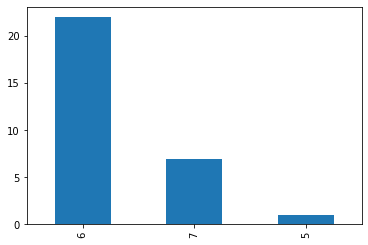

In [172]:
k['month'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


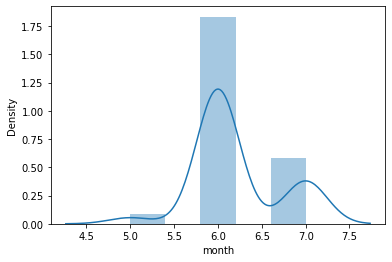

In [173]:
import seaborn as sns

sns.distplot(k['month'])

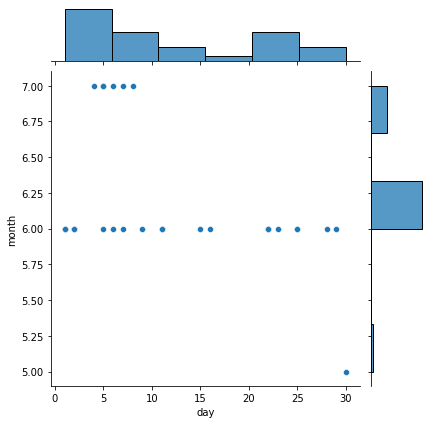

In [174]:
sns.jointplot(x="day", y="month", data=k)

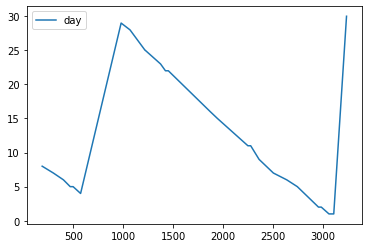

In [175]:
k.plot(y='day')

In [176]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [177]:
k[k['year']==2021]['text']

189     Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...
301     Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...
402     Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...
470     Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...
496     Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...
499     Νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...
574     Θοδωρής Γεωργακόπουλος: Πώς μιλάμε για την COV...
980     Τόκιο 2020: Ο κορωνοϊός «κρύβει» την Ολυμπιακή...
1069    Βρετανία – Κορωνοϊός: Ο νέος υπ. Υγείας θέλει ...
1220    Βρετανία: Μόνο 28 κρούσματα Covid στους 58.000...
1222    ΠΟΥ: Προς έγκριση δύο ακόμη εμβολίων Covid εντ...
1375    Τουρισμός: Η Ryanair βλέπει ταχεία αύξηση στα ...
1424    ΗΠΑ: Οι λόγοι που οι νεότεροι ενήλικες είναι λ...
1430    Η αύξηση του αριθμού των ασθενών με Covid που ...
1453    Σουηδία: Τα εμβόλια Covid θα είναι διαθέσιμα γ...
1873    Ιταλικά ΜΜΕ: Προς παράταση της κατάστασης έκτα...
1945    Ο Περσεβάλ Γκετ, ένας 12χρονος Γάλλος, είναι έ...
2250    Μια λέ

In [178]:
text = k[k['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [179]:
import requests
print(text[:200] + '...')

Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβασης κρουσμάτων Covid σε πλοίο από την Ίο #kathimerini #καθημερινη #κορωνοιος 
  Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,49% #kathimerini #καθημεριν...


In [180]:
#Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [181]:
list(STOPWORDS)[0:20]

['is',
 "wasn't",
 'ours',
 'no',
 'just',
 'between',
 'like',
 'ought',
 'same',
 'then',
 'who',
 "you're",
 "that's",
 'could',
 'when',
 "aren't",
 'should',
 "we'd",
 'itself',
 'he']

In [182]:
import spacy

In [183]:
!python -m spacy download el_core_news_sm
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [184]:
nlp = spacy.load("el_core_news_sm")
nlp_en=spacy.load('en_core_web_sm')

In [185]:
from spacy.lang.en.stop_words import STOP_WORDS
english_stopwords=list(STOP_WORDS)

print(english_stopwords)


['anyway', 'nine', 'just', 'beforehand', 'same', 'twenty', 'who', 'throughout', 'move', 'itself', 'he', 'these', 'sometime', 'would', 'at', 'against', 'a', 'without', 'yet', 'herself', 'really', 'where', 'ourselves', 'onto', 'perhaps', 'again', 'hence', 'too', 'amount', 'by', 'amongst', 'forty', 'they', 'somewhere', 'us', 'besides', 'seems', 'n’t', 'nor', 'last', 'back', 'whatever', 'you', 'him', 'over', 'every', 'call', 'doing', 'since', 'thereafter', 'cannot', 'not', 'his', 'somehow', 'least', 'latterly', 'himself', 'hereupon', 'both', 'nobody', 'wherever', 'behind', 'up', 'hereafter', 'how', 'own', 'others', 'even', 'none', 'bottom', 'along', 'almost', 'seem', 'more', 'thence', 'using', 'now', 'fifteen', 'is', 'between', 'whenever', 'could', 'when', 'nowhere', 'thru', 'often', 'must', '‘ll', 'around', 'the', 'make', 'give', '’re', 'into', 'with', 'upon', "'ll", 'show', 'never', 'also', 'though', 'always', 'well', 'an', 'via', 'becoming', 'three', 'per', 'full', 'becomes', 'here', 'l

In [186]:
list(nlp.Defaults.stop_words)[0:1000]

['ώστε',
 'οσηνδήποτε',
 'μέλλεται',
 'ποιούς',
 'αυτός',
 'ταύτου',
 'τέτοιαν',
 'αυτούς',
 'τόσος',
 'εάν',
 'δεν',
 'οι',
 'πάρα',
 'προτού',
 'τόσο',
 'ήσαστε',
 'περί',
 'έχουν',
 'έκαστη',
 'τόσης',
 'είτε',
 'ποιών',
 'οποιεσδήποτε',
 'γρήγορα',
 'κακώς',
 'γύρω',
 'ορισμένως',
 'πρώτη',
 'οποίο',
 'τέτοιοι',
 'ου',
 'πέρυσι',
 'μια',
 'συχνοί',
 'έξω',
 'μέσω',
 'οσονδήποτε',
 'πλάι',
 'ετούτες',
 'ότι',
 'όλων',
 'κάμποσος',
 'άνευ',
 'εξαιτίας',
 'είμαστε',
 'όσος',
 'πέρι',
 'συχνού',
 'συγχρόνως',
 'τόση',
 'παρά',
 'αλλιώτικα',
 'μιας',
 'μπορεί',
 'όλον',
 'έτερης',
 'συχνόν',
 'έχομε',
 'πρώτο',
 'κανείς',
 'κάποιων',
 'έκανε',
 'πρώτος',
 'όποιος',
 'εσείς',
 'δήθεν',
 'έναν',
 'επόμενη',
 'όλοι',
 'επί',
 'ποιά',
 'μόνο',
 'πόσης',
 'μόνος',
 'εμένα',
 'πολύ',
 'οσαδήποτε',
 'είσαστε',
 'οποίες',
 'εαυτούς',
 'ω',
 'εκείνων',
 'λιγότερο',
 'στης',
 'γιατί',
 'τελευταίο',
 'αφού',
 'τους',
 'εκτός',
 'δεξιά',
 'καμίας',
 'μακρυά',
 'ωσότου',
 'πώς',
 'εκείνες',
 'λοιπά'

In [187]:
def remove_punctuation(text):
	dict = {
			u"'": "",
			"'": "",
			u",": "",
			",": "",
			u".": "",
			".": "",
			u"``": "",
			"``": "",
			u"''": "",
			"''": "",
			u'"': "",
			'"': "",
			u"[":"",
			"[":"",
			u"]":"",
			"]":"",
			u">": "",
			">": "",
			u"<": "",
			"<": "",
			u";": "",
			";": "",
			u"·": "",
			'·': "",
			u"‘": "",
			"‘": "",
			u"’": "",
			"’": "",
			"–": "",
			u"–": "",
      "και":"",
      ":":"",
      "!":"",
      u";":"",
      "»":"",
      "«":"",
      "%":"",
      " ή ":"",
      " κ ":"",
      " ( ":"",
      " ) ":"",
      " - ":""
			}
	regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))
	return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)


In [188]:
final_text=remove_punctuation(amp_regex)

In [189]:
gr_stopwords=list(nlp.Defaults.stop_words)
final_stopwords=gr_stopwords+ english_stopwords

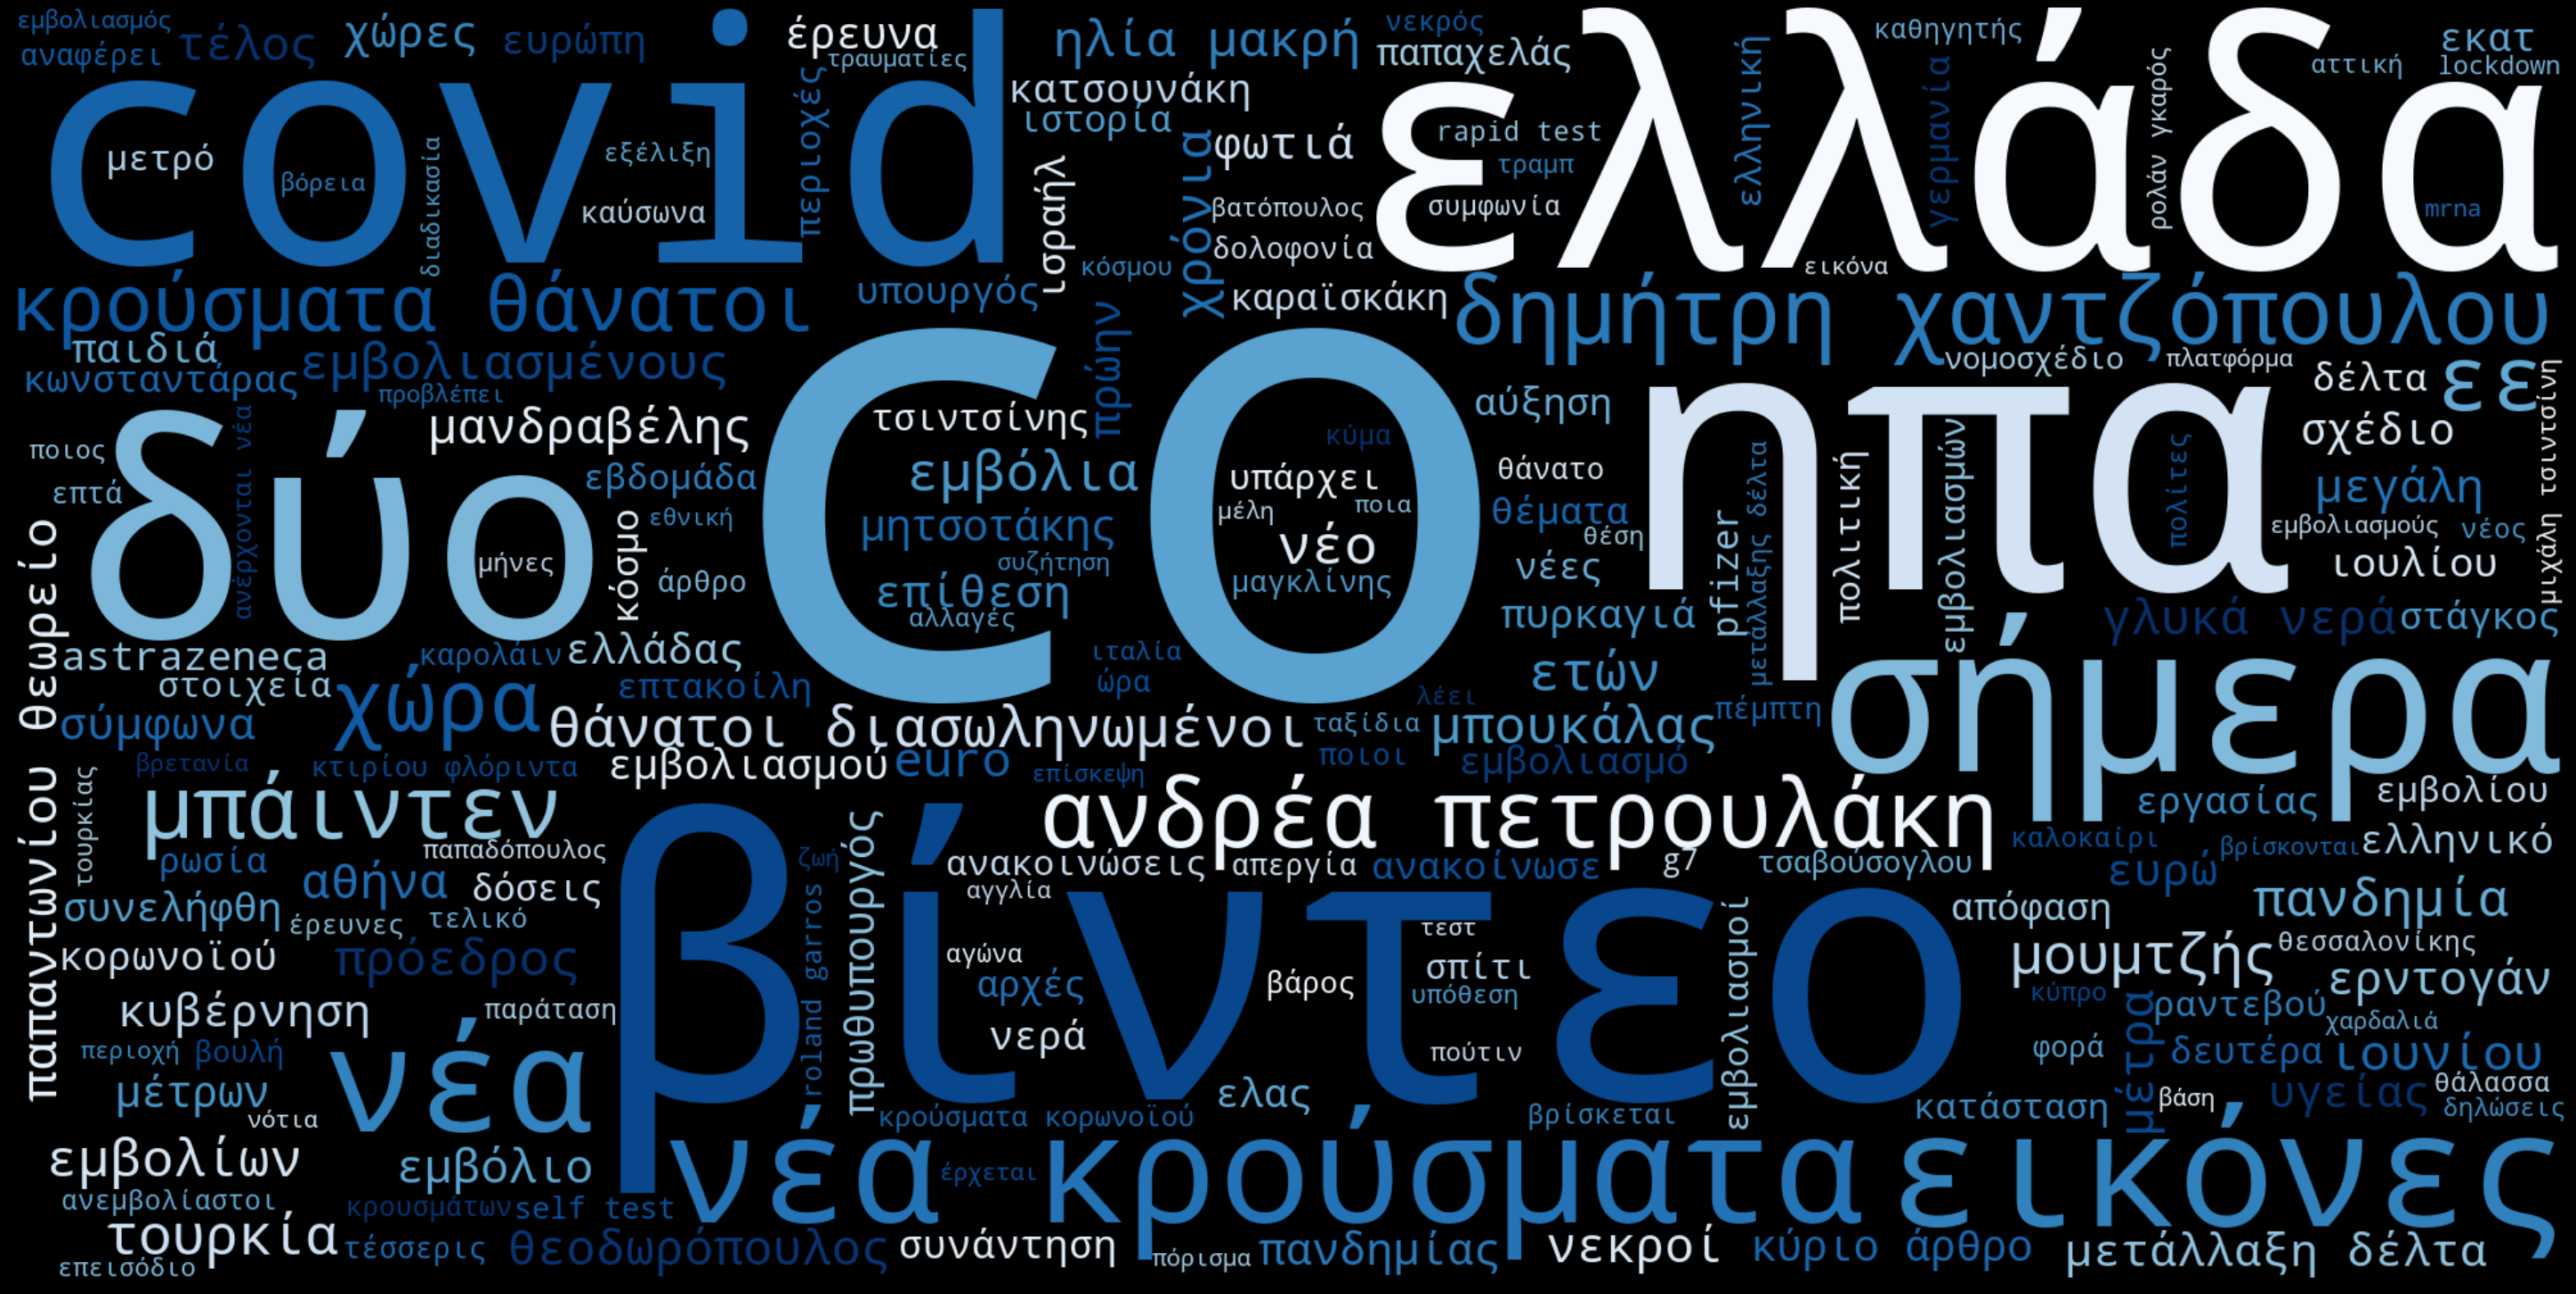

In [190]:
wordcloud = WordCloud(
    stopwords = final_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap="Blues"
 ).generate(final_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [191]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tweets_tokens = word_tokenize(final_text)
tokens_without_sw = [word for word in tweets_tokens if not word in final_stopwords]

print(tokens_without_sw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['παρακολουθήσει', 'μεγάλο', 'τελικό', 'βίντεο', 'φωτογραφίες', 'παπαχελάς', 'νέος', 'ψυχρός', 'πόλεμος', 'άρθρο', 'ώρα', 'λύσεις', 'εθνικό', 'ζήτημα', 'επίσπευση', 'εμβολιασμού', 'ελλάδα', 'τονίζει', 'συνέντευξη', 'διδάκτωρ', 'μοριακής', 'βιολογίας', 'γιάννης', 'πρασσάς', 'αγγλία', 'αγωνίζεται', 'τρόπαιο', 'εuro', 'σπίτι', 'ατρόμητη', 'ιταλία', 'ηλία', 'μακρή', '(', '11/07/21', ')', 'δημήτρη', 'χαντζόπουλου', '(', '11/07/21', ')', 'ανδρέα', 'πετρουλάκη', '(', '11/07/21', ')', 'αναμενόμενο', 'έρχεται', 'αντιμέτωπη', 'χώρα', 'τέταρτο', 'πανδημικό', 'κύμα', 'covid-19', 'δισεκατομμυριούχος', 'ρίτσαρντ', 'μπράνσον', 'απογειώθηκε', 'διαστημικό', 'σκάφος', 'virgin', 'galactic', 'εταιρεία', 'ανακοίνωσε', 'σκάφος', 'έφτασε', 'διάστημα', 'ψυχροπολεμικός', 'ανταγωνισμός', 'διάστημα', 'βρίσκεται', 'σελίδες', 'ιστορικών', 'βιβλίων', 'λαχτάρα', 'εξερεύνηση', 'παραμένει', 'ζωντανή', '1465',

[('(', 214), (')', 214), ('νέα', 89), ('κ', 75), ('βίντεο', 72), ('2021', 69), ('ελλάδα', 68), ('ηπα', 66), ('κρούσματα', 65), ('δύο', 52), ('σήμερα', 48), ('δέλτα', 46), ('χώρα', 44), ('ετών', 44), ('εικόνες', 42), ('covid', 41)]


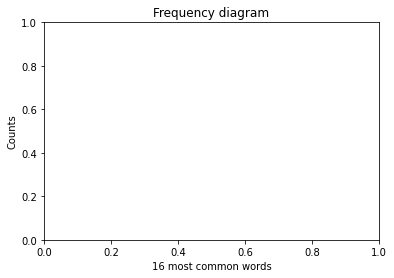

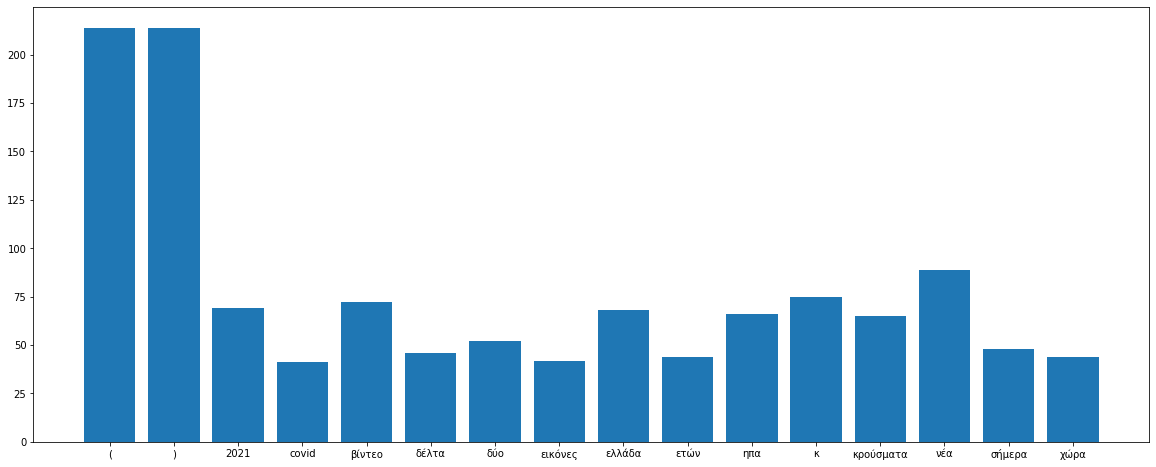

None


In [192]:
from collections import Counter

most_frequent = Counter(tokens_without_sw).most_common(16)
print(most_frequent) 

def plot_most_frequent(frequent):
    frequent = sorted(frequent, key=lambda pair: pair[0], reverse=False)
    x = list(map(lambda h: h[0], frequent))
    y = list(map(lambda h: h[1], frequent)) 
    
    plt.title("Frequency diagram")
    plt.xlabel("16 most common words")
    plt.ylabel("Counts")
    plt.figure(figsize=(20,8))

    plt.bar(x, y)
    plt.show()
    
print(plot_most_frequent(most_frequent[:16]))

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [195]:
count_vector = cv.fit_transform(k['text'])

In [196]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  12χρονος  16  19  1η  200  2020  28  300  49  58  81  cnn  covid  g7  \
0    0         0   0   0   0    0     0   0    0   0   0   0    0      1   0   
1    0         0   0   0   0    0     0   0    0   1   0   0    0      1   0   
2    0         0   0   0   0    0     0   0    0   0   0   0    0      1   0   
3    0         0   0   0   0    0     0   0    0   0   0   0    0      1   0   
4    0         0   0   0   0    0     0   0    0   0   0   0    0      0   0   

   kathimerini  ryanair  tokyo2020  άνω  άρση  έγκριση  έκτακτης  έναντι  \
0            1        0          0    0     0        0         0       0   
1            1        0          0    0     0        0         0       0   
2            1        0          0    0     0        0         0       0   
3            1        0          0    0     0        0         0       0   
4            1        0          0    0     0        0         0       0   

   ένας  έρευνα  έτοιμη  έχει  ίο  αγρίνιο  αεροπορικές  ακόμη  ανάγκης  \
0     0       0       0     0   1        0            0      0        0   
1     0       0       0     0   0        0            0      0        0   
2     0       0       0     0   0        0            0      0        0   
3     0       0       0     0   0        0            0      0        0   
4     0       0       0     1   0        0            0      1        0   

   αναδεικνύει  ανταλλαγή  ανταποκρίνονται  ανυπόστατα  αποδίδεται  από  \
0            0          0                0           1           0    1   
1            0          0                0           0           0    0   
2            0          1                0           0           0    0   
3            0          0                0           0           0    1   
4            0          0                0           0           0    0   

   αρθούν  αριθμού  ασθενών  αυξημένο  αυτοαπομόνωση  αύξηση  βιολογικών  \
0       0        0        0         0              0       0           0   
1       0        0        0         0              0       1           0   
2       0        0        0         0              0       0           0   
3       0        0        0         0              1       0           0   
4       0        0        0         0              0       0           0   

   βλέπει  βρίσκονταν  βρετανία  γάλλος  γερμανική  ...  προστατευτική  \
0       0           0         0       0          0  ...              0   
1       0           0         0       0          0  ...              0   
2       0           0         0       0          0  ...              0   
3       0           0         0       0          0  ...              0   
4       0           0         0       0          0  ...              0   

   προϊόντων  πρόστιμο  πρώτο  πώς  σήμερα  σε  σουηδία  στα  στη  στην  στις  \
0          0         0      0    0       0   1        0    0    0     0     0   
1          0         0      0    0       0   0        0    0    0     0     0   
2          0         0      0    0       0   0        0    0    0     0     0   
3          0         0      0    0       0   1        0    0    0     0     0   
4          0         0      0    0       0   0        0    0    0     0     0   

   στο  στους  συζητήσεων  συμμετέχοντες  συμμετοχή  συμφώνησαν  συντομότερο  \
0    0      0           0              0          0           0            0   
1    0      0           0              0          0           0            0   
2    0      0           0              0          0           1            0   
3    0      0           0              0          0           0            0   
4    0      0           0              0          0           0            0   

   σχεδόν  τήρηση  τα  ταξίδια  ταξιδιώτες  ταχεία  τεστ  τη  την  της  τις  \
0       0       0   1        0           0       0     0   0    1    0    0   
1       0       0   0        0           0       0     1   0    0    0    0   
2       0       0   0        0           0       0     0

In [197]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95)

In [198]:
count_vector = cv.fit_transform(k['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [199]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  12χρονος  16  19  1η  200  2020  28  300  49  58  81  cnn  covid  g7  \
0    0         0   0   0   0    0     0   0    0   0   0   0    0      1   0   
1    0         0   0   0   0    0     0   0    0   1   0   0    0      1   0   
2    0         0   0   0   0    0     0   0    0   0   0   0    0      1   0   
3    0         0   0   0   0    0     0   0    0   0   0   0    0      1   0   
4    0         0   0   0   0    0     0   0    0   0   0   0    0      0   0   

   kathimerini  ryanair  tokyo2020  άρση  έγκριση  έκτακτης  έναντι  έρευνα  \
0            1        0          0     0        0         0       0       0   
1            1        0          0     0        0         0       0       0   
2            1        0          0     0        0         0       0       0   
3            1        0          0     0        0         0       0       0   
4            1        0          0     0        0         0       0       0   

   έτοιμη  ίο  αγρίνιο  αεροπορικές  ανάγκης  αναδεικνύει  ανταλλαγή  \
0       0   1        0            0        0            0          0   
1       0   0        0            0        0            0          0   
2       0   0        0            0        0            0          1   
3       0   0        0            0        0            0          0   
4       0   0        0            0        0            0          0   

   ανταποκρίνονται  ανυπόστατα  αποδίδεται  αρθούν  αριθμού  ασθενών  \
0                0           1           0       0        0        0   
1                0           0           0       0        0        0   
2                0           0           0       0        0        0   
3                0           0           0       0        0        0   
4                0           0           0       0        0        0   

   αυξημένο  αυτοαπομόνωση  αύξηση  βιολογικών  βλέπει  βρίσκονταν  βρετανία  \
0         0              0       0           0       0           0         0   
1         0              0       1           0       0           0         0   
2         0              0       0           0       0           0         0   
3         0              1       0           0       0           0         0   
4         0              0       0           0       0           0         0   

   γάλλος  γερμανική  γεωργακόπουλος  γεωργαντάς  γκετ  γλυφάδα  γουχάν  ...  \
0       0          0               0           0     0        0       0  ...   
1       0          0               0           0     0        1       0  ...   
2       0          0               0           0     0        0       0  ...   
3       0          0               0           0     0        0       0  ...   
4       0          0               0           0     0        0       0  ...   

   νότιας  ολυμπιακή  πάρτι  πέθανε  πανεπιστημίου  παράταση  παραγωγή  \
0       0          0      0       0              0         0         0   
1       0          0      0       0              0         0         0   
2       0          0      0       0              0         0         0   
3       0          0      0       0              0         0         0   
4       0          0      0       0              0         0         0   

   παραλείψεις  παραλλαγή  παραμένει  περιορισμοί  περιορισμούς  περιορισμών  \
0            0          0          0            0             0            0   
1            0          0          0            0             0            0   
2            0          0          0            0             0            0   
3            0          0          0            0             0            0   
4            0          0          0            0             0            0   

   περσεβάλ  πηγές  πιέζουν  πιθανό  πιλοτικές  πιστοποιητικά  πιστοποιητικό  \
0         0      1        0       0          0              0              0   
1         0      0        0       0          0              0              0   
2         0      0        0       0          0       

In [200]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    return(lemmatized_tokens)

In [201]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer) 

In [202]:
cv = CountVectorizer( stop_words= final_stopwords, max_features=20) 

In [203]:
results.sum(axis =0).sort_values(ascending = False)

καθημερινη     27
kathimerini    27
covid          26
κορωνοιος      21
κορωνοϊός       5
               ..
μεσογειακής     1
μελέτη          1
μεθ             1
μίντλετον       1
000             1
Length: 184, dtype: int64

In [204]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(40)

καθημερινη       27
kathimerini      27
covid            26
κορωνοιος        21
κορωνοϊός         5
μέτρων            3
εμβόλια           3
αύξηση            3
ισραήλ            2
έρευνα            2
εμβολίων          2
άρση              2
ευρωπαϊκό         2
νέα               2
ηπα               2
ευρώπη            2
βρετανία          2
πιστοποιητικό     2
δύο               2
εκδηλώσεις        1
δράση             1
εμβολίου          1
ενεργοποιούν      1
διατροφής         1
εμβολιάζεται      1
εμβολιαστούν      1
διαθέσιμα         1
ενήλικες          1
δεδομένα          1
ενδείξεις         1
ελλάδα            1
επιβίβασης        1
ενισχύει          1
ζωολογικό         1
ινδίας            1
ιδιοκτήτη         1
θοδωρής           1
θνητότητας        1
θετικών           1
θέλει             1
dtype: int64

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [206]:
tfidf_vectorizer = TfidfVectorizer(stop_words= final_stopwords, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(k['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [207]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000  12χρονος   16   19   1η  200  2020   28  300        49   58   81  cnn  \
0  0.0       0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
1  0.0       0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.444612  0.0  0.0  0.0   
2  0.0       0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.0       0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
4  0.0       0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

      covid   g7  kathimerini  ryanair  tokyo2020  άρση  έγκριση  έκτακτης  \
0  0.111883  0.0     0.108308      0.0        0.0   0.0      0.0       0.0   
1  0.135273  0.0     0.130951      0.0        0.0   0.0      0.0       0.0   
2  0.119486  0.0     0.115668      0.0        0.0   0.0      0.0       0.0   
3  0.130990  0.0     0.126804      0.0        0.0   0.0      0.0       0.0   
4  0.000000  0.0     0.175975      0.0        0.0   0.0      0.0       0.0   

   έναντι  έρευνα  έτοιμη        ίο  αγρίνιο  αεροπορικές  ανάγκης  \
0     0.0     0.0     0.0  0.367733      0.0          0.0      0.0   
1     0.0     0.0     0.0  0.000000      0.0          0.0      0.0   
2     0.0     0.0     0.0  0.000000      0.0          0.0      0.0   
3     0.0     0.0     0.0  0.000000      0.0          0.0      0.0   
4     0.0     0.0     0.0  0.000000      0.0          0.0      0.0   

   αναδεικνύει  ανταλλαγή  ανταποκρίνονται  ανυπόστατα  αποδίδεται  αρθούν  \
0          0.0   0.000000              0.0    0.367733         0.0     0.0   
1          0.0   0.000000              0.0    0.000000         0.0     0.0   
2          0.0   0.392723              0.0    0.000000         0.0     0.0   
3          0.0   0.000000              0.0    0.000000         0.0     0.0   
4          0.0   0.000000              0.0    0.000000         0.0     0.0   

   αριθμού  ασθενών  αυξημένο  αυτοαπομόνωση    αύξηση  βιολογικών  βλέπει  \
0      0.0      0.0       0.0       0.000000  0.000000         0.0     0.0   
1      0.0      0.0       0.0       0.000000  0.362229         0.0     0.0   
2      0.0      0.0       0.0       0.000000  0.000000         0.0     0.0   
3      0.0      0.0       0.0       0.430533  0.000000         0.0     0.0   
4      0.0      0.0       0.0       0.000000  0.000000         0.0     0.0   

   βρίσκονταν  βρετανία  γάλλος  γερμανική  γεωργακόπουλος  γεωργαντάς  γκετ  \
0         0.0       0.0     0.0        0.0             0.0         0.0   0.0   
1         0.0       0.0     0.0        0.0             0.0         0.0   0.0   
2         0.0       0.0     0.0        0.0             0.0         0.0   0.0   
3         0.0       0.0     0.0        0.0             0.0         0.0   0.0   
4         0.0       0.0     0.0        0.0             0.0         0.0   0.0   

    γλυφάδα  γουχάν  ...  νότιας  ολυμπιακή  πάρτι  πέθανε  πανεπιστημίου  \
0  0.000000     0.0  ...     0.0        0.0    0.0     0.0            0.0   
1  0.444612     0.0  ...     0.0        0.0    0.0     0.0            0.0   
2  0.000000     0.0  ...     0.0        0.0    0.0     0.0            0.0   
3  0.000000     0.0  ...     0.0        0.0    0.0     0.0            0.0   
4  0.000000     0.0  ...     0.0        0.0    0.0     0.0            0.0   

   παράταση  παραγωγή  παραλείψεις  παραλλαγή  παραμένει  περιορισμοί  \
0       0.0       0.0          0.0        0.0        0.0          0.0   
1       0.0       0.0          0.0        0.0        0.0          0.0   
2       0.0       0.0          0.0        0.0        0.0          0.0   
3       0.0       0.0          0.0        0.0        0.0          0.0   
4       0.0       0.0          0.0        0.0        0.0          0.0   

   περιορισμούς  περιορισμών  περσεβάλ     πηγές  πιέζουν  πιθανό  πιλοτικές  \
0           0.0          0.0       0.0  0.367733      0.0     0.0        0.0   
1           0.0          0.0       0.0  0.000000      0.0     0.0        0.0   
2           0.0          0.0       0.0  0.000000      0.0     0.0

In [248]:
from sklearn.metrics.pairwise import cosine_similarity


print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.064572   0.05703606 0.06252734 0.06643499 0.05182355
  0.05413808 0.0246988  0.04034358 0.05074855 0.07275378 0.05466397
  0.05837421 0.05466397 0.064572   0.05340672 0.05074855 0.02941827
  0.064572   0.06592173 0.01454465 0.03274115 0.05936568 0.01297065
  0.03629656 0.04263557 0.04518749 0.05012501 0.05495203 0.00948219]]


In [249]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.064572   0.05703606 0.06252734 0.06643499 0.05182355
  0.05413808 0.0246988  0.04034358 0.05074855 0.07275378 0.05466397
  0.05837421 0.05466397 0.064572   0.05340672 0.05074855 0.02941827
  0.064572   0.06592173 0.01454465 0.03274115 0.05936568 0.01297065
  0.03629656 0.04263557 0.04518749 0.05012501 0.05495203 0.00948219]
 [0.064572   1.         0.06896009 0.07559938 0.08032397 0.06265785
  0.06545626 0.02986237 0.04877786 0.06135811 0.08796378 0.17716883
  0.070578   0.17716883 0.07807151 0.064572   0.06135811 0.0355685
  0.07807151 0.07970341 0.01758537 0.03958605 0.07177675 0.01568231
  0.04388477 0.05154902 0.05463444 0.06060421 0.06644037 0.01146455]
 [0.05703606 0.06896009 1.         0.06677648 0.1880106  0.0553453
  0.05781712 0.10222594 0.11417207 0.05419725 0.23409533 0.05837875
  0.06234113 0.05837875 0.06896009 0.05703606 0.05419725 0.03141744
  0.06896009 0.07040154 0.01553306 0.03496612 0.06339997 0.01385209
  0.03876315 0.04553294 0.254

In [250]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

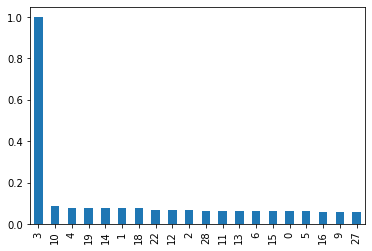

In [251]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

array([[1.        , 0.064572  , 0.05703606, 0.06252734, 0.06643499,
        0.05182355, 0.05413808, 0.0246988 , 0.04034358, 0.05074855,
        0.07275378, 0.05466397, 0.05837421, 0.05466397, 0.064572  ,
        0.05340672, 0.05074855, 0.02941827, 0.064572  , 0.06592173,
        0.01454465, 0.03274115, 0.05936568, 0.01297065, 0.03629656,
        0.04263557, 0.04518749, 0.05012501, 0.05495203, 0.00948219],
       [0.064572  , 1.        , 0.06896009, 0.07559938, 0.08032397,
        0.06265785, 0.06545626, 0.02986237, 0.04877786, 0.06135811,
        0.08796378, 0.17716883, 0.070578  , 0.17716883, 0.07807151,
        0.064572  , 0.06135811, 0.0355685 , 0.07807151, 0.07970341,
        0.01758537, 0.03958605, 0.07177675, 0.01568231, 0.04388477,
        0.05154902, 0.05463444, 0.06060421, 0.06644037, 0.01146455],
       [0.05703606, 0.06896009, 1.        , 0.06677648, 0.1880106 ,
        0.0553453 , 0.05781712, 0.10222594, 0.11417207, 0.05419725,
        0.23409533, 0.05837875, 0.06234113, 0.

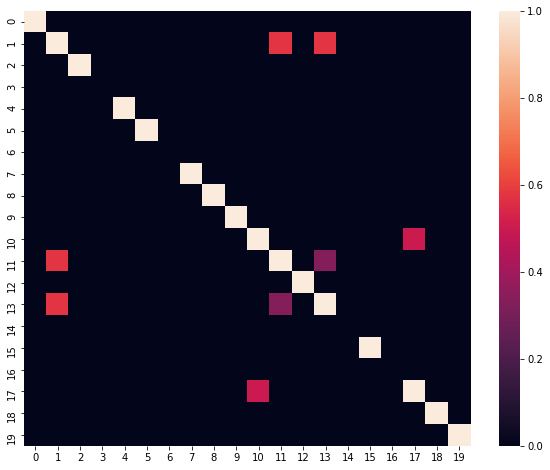

In [254]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

plt.figure(figsize= (10,8))
ax = sns.heatmap(cosine_similarity(wordcount_df.head(20), wordcount_df.head(20)))
cosine_similarity(X=tfidf_matrix_train, Y=None, dense_output=True)

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords

In [213]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [214]:
print("Number of articles scraped (before cleaning): ", k.shape[0])

Number of articles scraped (before cleaning):  30


In [215]:
k.drop_duplicates(inplace=True)

In [216]:
k = k.reset_index(drop=True)

In [217]:
k = k.replace(np.nan, '0')

In [218]:
k['month'].value_counts().head(10)

6    22
7     7
5     1
Name: month, dtype: int64

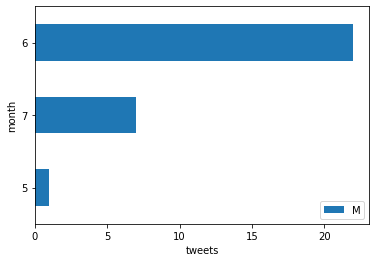

In [219]:
%matplotlib inline
k['month'].value_counts().head(10).sort_values().plot(kind='barh')
plt.xlabel('tweets')
plt.ylabel('month')
plt.legend('Most tweets per month')

In [220]:
import string
def clean_text(k):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", k.lower())
    return re.sub(r'\W+', ' ', clean1)

In [221]:
k['tokenized'] = k['text'].map(lambda x: clean_text(x))

In [222]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [223]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [224]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [225]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= final_stopwords,
                      ngram_range=(1, 2))

In [226]:
matrix = vec.fit_transform(k['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've', 'αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  αυτοκινητοδρομος  αυγουστος  βερολινο  βικτωρια  βοστωνη  \
0     0       0                 0          0         0         0        0   
1     0       0                 0          0         0         0        0   
2     0       0                 0          0         0         0        0   
3     0       0                 0          0         0         0        0   
4     0       0                 0          0         0         0        0   

   γαμηλιο ταξιδι  γεννηση παιδιου  γαιδαρος  γατα  γερμανος  γιαννης  \
0               0                0         0     0         0        0   
1               0                0         0     0         0        0   
2               0                0         0     0         0        0   
3               0                0         0     0         0        0   
4               0                0         0     0         0        0   

   γνωστοποιηση  γυαλια  διακοπη  διευθυντρια σχολειου  διδυμοι  δεξαμενη  \
0             0       0        0                     0        0         0   
1             0       0        0                     0        0         0   
2             0       0        0                     0        0         0   
3             0       0        0                     0        0         0   
4             0       0        0                     0        0         0   

   δευτερα παρουσια  δευτερον  δημοκρατια  διαρκεια ζωης  διαδρομη  \
0                 0         0           0              0         0   
1                 0         0           0              0         0   
2                 0         0           0              0         0   
3                 0         0           0              0         0   
4                 0         0           0              0         0   

   διαλογισμος  διεθνες  διευθυνσεις  δραμα  εξαρτηση  εξωτερικου χωρου  \
0            0        0            0      0         0                 0   
1            0        0            0      0         0                 0   
2            0        0            0      0         0                 0   
3            0        0            0      0         0                 0   
4            0        0            0      0         0                 0   

   επικοινωνω  επιπτωσεις  επιστροφη  εργαστηρι  εγγραφειτε  εκδηλωση  \
0           0           0          0          0           0         0   
1           0           0          0          0           0         0   
2           0           0          0          0           0         0   
3           0           0          0          0           0         0   
4           0           0          0          0           0         0   

   εκθεση ιδεων  εκκλησια  εν τω μεταξυ  ενταση ηχου  επικολληση  εποπτης  \
0             0         0             0            0           0        0   
1             0         0             0            0           0        0   
2             0         0             0            0           0        0   
3             0         0             0            0           0        0   
4             0         0             0            0           0        0   

   ...  εθελοντισμος  κανω εμετο  αναθηματικος  αποδειξη πληρωμης  \
0  ...             0           0             0                  0   
1  ...             0           0             0                  0   
2  ...             0           0             0                  0   
3  ...             0           0             0                  0   
4  ...             0           0             0                

In [227]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [228]:
k['anger'] = wordcount_df[angry_words].sum(axis=1)

k['positivity'] = wordcount_df[positive_words].sum(axis=1)


k['joy'] = wordcount_df[joy_words].sum(axis=1)


k['disgust'] = wordcount_df[disgust_words].sum(axis=1)



k['surprise'] = wordcount_df[surprise_words].sum(axis=1)

k['trust'] = wordcount_df[trust_words].sum(axis=1)


k['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


k['sadness'] = wordcount_df[sadness_words].sum(axis=1)

k['negative'] = wordcount_df[negative_words].sum(axis=1)

k['fear'] = wordcount_df[fear_words].sum(axis=1)


In [229]:
k

date                                               text  \
0  2021-07-08 19:39:51  Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...   
1  2021-07-07 11:23:23  Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...   
2  2021-07-06 07:39:53  Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...   
3  2021-07-05 09:42:37  Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...   
4  2021-07-05 05:52:23  Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...   
5  2021-07-05 05:17:07  Νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...   
6  2021-07-04 10:00:40  Θοδωρής Γεωργακόπουλος: Πώς μιλάμε για την COV...   
7  2021-06-29 10:06:32  Τόκιο 2020: Ο κορωνοϊός «κρύβει» την Ολυμπιακή...   
8  2021-06-28 10:37:13  Βρετανία – Κορωνοϊός: Ο νέος υπ. Υγείας θέλει ...   
9  2021-06-25 17:47:28  Βρετανία: Μόνο 28 κρούσματα Covid στους 58.000...   
10 2021-06-25 17:32:40  ΠΟΥ: Προς έγκριση δύο ακόμη εμβολίων Covid εντ...   
11 2021-06-23 13:19:51  Τουρισμός: Η Ryanair βλέπει ταχεία αύξηση στα ...   
12 2021-06-22 21:09:32  ΗΠΑ: Οι λόγοι που οι νεότεροι ενήλικες είναι λ...   
13 2021-06-22 18:44:33  Η αύξηση του αριθμού των ασθενών με Covid που ...   
14 2021-06-22 13:40:50  Σουηδία: Τα εμβόλια Covid θα είναι διαθέσιμα γ...   
15 2021-06-16 12:12:45  Ιταλικά ΜΜΕ: Προς παράταση της κατάστασης έκτα...   
16 2021-06-15 17:14:54  Ο Περσεβάλ Γκετ, ένας 12χρονος Γάλλος, είναι έ...   
17 2021-06-11 10:41:02  Μια λέαινα πέθανε από Covid και δύο λιοντάρια ...   
18 2021-06-11 07:17:25  G7: Εμβόλια Covid και κλίμα στο επίκεντρο των ...   
19 2021-06-09 15:46:34  Γερμανική έρευνα: Οι ηλικιωμένοι ανταποκρίνοντ...   
20 2021-06-07 20:55:02  «Το Ευρωπαϊκό Πιστοποιητικό COVID θα χρησιμοπο...   
21 2021-06-06 12:08:37  Χαλκιδική: Πρόστιμο 3.300 ευρώ σε ιδιοκτήτη κα...   
22 2021-06-05 05:25:53  ΗΠΑ: Αεροπορικές πιέζουν για άρση των περιορισ...   
23 2021-06-02 14:22:51  Αγρίνιο: Αυξημένο ποσοστό θνητότητας στη ΜΕΘ C...   
24 2021-06-02 08:53:58  Γ. Γεωργαντάς: 81.200 ευρωπαϊκά πιστοποιητικά ...   
25 2021-06-01 12:24:20  CNN: Η Μύκονος είναι έτοιμη για πάρτι όπως στη...   
26 2021-06-01 08:14:01  Ισραήλ – Κορωνοϊός: Άρση σχεδόν όλων των μέτρω...   
27 2021-06-01 06:32:05  Γουχάν: Το Ινστιτούτο Βιολογικών Προϊόντων ενι...   
28 2021-06-01 04:35:58  Η Ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...   
29 2021-05-30 09:06:04  Ενδείξεις για προστατευτική δράση της μεσογεια...   

    year  month  day                                          tokenized  \
0   2021      7    8  πηγές υπ ναυτιλίας ανυπόστατα τα περί επιβίβασ...   
1   2021      7    7  γλυφάδα αύξηση των θετικών τεστ covid κατά 849...   
2   2021      7    6  κορωνοϊός ισραήλ και νότια κορέα συμφώνησαν γι...   
3   2021      7    5  σε αυτοαπομόνωση η κέιτ μίντλετον μετά από επα...   
4   2021      7    5  μπάιντεν ο κορωνοϊός δεν έχει ακόμη νικηθεί ka...   
5   2021      7    5  νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...   
6   2021      7    4  θοδωρής γεωργακόπουλος πώς μιλάμε για την covi...   
7   2021      6   29  τόκιο 2020 ο κορωνοϊός κρύβει την ολυμπιακή φλ...   
8   2021      6   28  βρετανία κορωνοϊός ο νέος υπ υγείας θέλει να α...   
9   2021      6   25  βρετανία μόνο 28 κρούσματα covid στους 58000 σ...   
10  2021      6   25  που προς έγκριση δύο ακόμη εμβολίων covid εντό...   
11  2021      6   23  τουρισμός η ryanair βλέπει ταχεία αύξηση στα τ...   
12  2021      6   22  ηπα οι λόγοι που οι νεότεροι ενήλικες είναι λι...   
13  2021      6   22  η αύξηση του αριθμού των ασθενών με covid που ...   
14  2021      6   22  σουηδία τα εμβόλια covid θα είναι διαθέσιμα γι...   
15  2021      6   16  ιταλικά μμε προς παράταση της κατάστασης έκτακ...   
16  2021      6   15  ο περσεβάλ γκετ ένας 12χρονος γάλλος είναι ένα...   
17  2021      6   11  μια λέαινα πέθανε από covid και δύο λιοντάρια ...   
18  2021      6   11  g7 εμβόλια covid και κλίμα στο επίκεντρο των σ...   
19  2021      6    9  γερμανική έρευνα οι ηλικιωμένοι ανταποκρίνοντα...   
20  2021      6    7   το ευρωπαϊκό πιστοποιητικό covid

In [230]:
k.set_index('date' , inplace=True)

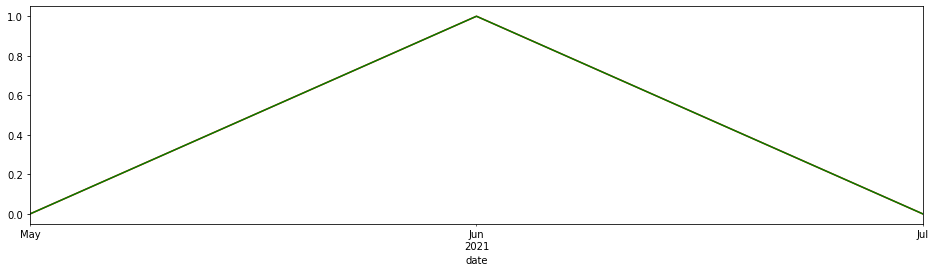

In [231]:
ax = k['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
k['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

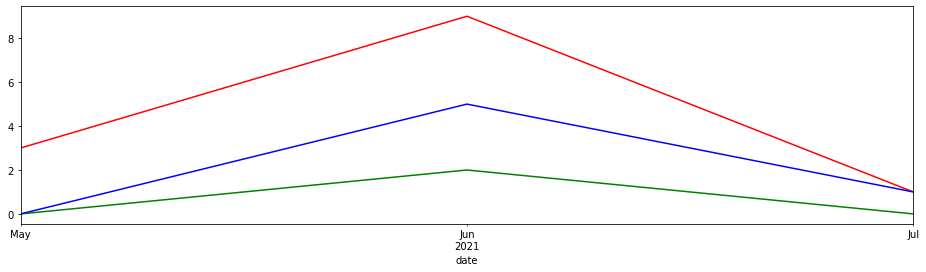

In [232]:
ax = k['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
k['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
k['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [233]:
pip install vaderSentiment

In [234]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
k['text'] = k['text'].apply(analyzer.polarity_scores)
pd.concat([k.drop(['text'], axis=1), k['text'].apply(pd.Series)], axis=1)

year  month  day  \
date                                    
2021-07-08 19:39:51  2021      7    8   
2021-07-07 11:23:23  2021      7    7   
2021-07-06 07:39:53  2021      7    6   
2021-07-05 09:42:37  2021      7    5   
2021-07-05 05:52:23  2021      7    5   
2021-07-05 05:17:07  2021      7    5   
2021-07-04 10:00:40  2021      7    4   
2021-06-29 10:06:32  2021      6   29   
2021-06-28 10:37:13  2021      6   28   
2021-06-25 17:47:28  2021      6   25   
2021-06-25 17:32:40  2021      6   25   
2021-06-23 13:19:51  2021      6   23   
2021-06-22 21:09:32  2021      6   22   
2021-06-22 18:44:33  2021      6   22   
2021-06-22 13:40:50  2021      6   22   
2021-06-16 12:12:45  2021      6   16   
2021-06-15 17:14:54  2021      6   15   
2021-06-11 10:41:02  2021      6   11   
2021-06-11 07:17:25  2021      6   11   
2021-06-09 15:46:34  2021      6    9   
2021-06-07 20:55:02  2021      6    7   
2021-06-06 12:08:37  2021      6    6   
2021-06-05 05:25:53  2021      6    5   
2021-06-02 14:22:51  2021      6    2   
2021-06-02 08:53:58  2021      6    2   
2021-06-01 12:24:20  2021      6    1   
2021-06-01 08:14:01  2021      6    1   
2021-06-01 06:32:05  2021      6    1   
2021-06-01 04:35:58  2021      6    1   
2021-05-30 09:06:04  2021      5   30   

                                                             tokenized  anger  \
date                                                                            
2021-07-08 19:39:51  πηγές υπ ναυτιλίας ανυπόστατα τα περί επιβίβασ...      0   
2021-07-07 11:23:23  γλυφάδα αύξηση των θετικών τεστ covid κατά 849...      0   
2021-07-06 07:39:53  κορωνοϊός ισραήλ και νότια κορέα συμφώνησαν γι...      0   
2021-07-05 09:42:37  σε αυτοαπομόνωση η κέιτ μίντλετον μετά από επα...      0   
2021-07-05 05:52:23  μπάιντεν ο κορωνοϊός δεν έχει ακόμη νικηθεί ka...      0   
2021-07-05 05:17:07  νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...      0   
2021-07-04 10:00:40  θοδωρής γεωργακόπουλος πώς μιλάμε για την covi...      0   
2021-06-29 10:06:32  τόκιο 2020 ο κορωνοϊός κρύβει την ολυμπιακή φλ...      1   
2021-06-28 10:37:13  βρετανία κορωνοϊός ο νέος υπ υγείας θέλει να α...      0   
2021-06-25 17:47:28  βρετανία μόνο 28 κρούσματα covid στους 58000 σ...      0   
2021-06-25 17:32:40  που προς έγκριση δύο ακόμη εμβολίων covid εντό...      0   
2021-06-23 13:19:51  τουρισμός η ryanair βλέπει ταχεία αύξηση στα τ...      0   
2021-06-22 21:09:32  ηπα οι λόγοι που οι νεότεροι ενήλικες είναι λι...      0   
2021-06-22 18:44:33  η αύξηση του αριθμού των ασθενών με covid που ...      0   
2021-06-22 13:40:50  σουηδία τα εμβόλια covid θα είναι διαθέσιμα γι...      0   
2021-06-16 12:12:45  ιταλικά μμε προς παράταση της κατάστασης έκτακ...      0   
2021-06-15 17:14:54  ο περσεβάλ γκετ ένας 12χρονος γάλλος είναι ένα...      0   
2021-06-11 10:41:02  μια λέαινα πέθανε από covid και δύο λιοντάρια ...      0   
2021-06-11 07:17:25  g7 εμβόλια covid και κλίμα στο επίκεντρο των σ...      0   
2021-06-09 15:46:34  γερμανική έρευνα οι ηλικιωμένοι ανταποκρίνοντα...      0   
2021-06-07 20:55:02   το ευρωπαϊκό πιστοποιητικό covid θα χρησιμοπο...      0   
2021-06-06 12:08:37  χαλκιδική πρόστιμο 3300 ευρώ σε ιδιοκτήτη καφέ...      0   
2021-06-05 05:25:53  ηπα αεροπορικές πιέζουν για άρση των περιορισμ...      0   
2021-06-02 14:22:51  αγρίνιο αυξημένο ποσοστό θνητότητας στη μεθ co...      0   
2021-06-02 08:53:58  γ γεωργαντάς 81200 ευρωπαϊκά πιστοποιητικά cov...      0   
2021-06-01 12:24:20  cnn η μύκονος είναι έτοιμη για πάρτι όπως στην...      0   
2021-06-01 08:14:01  ισραήλ κορωνοϊός άρση σχεδόν όλων των μέτρων π...      0   
2021-06-01 06:32:05  γουχάν το ινστιτούτο βιολογικών προϊόντων ενισ...      0   
2021-06-01 04:35:58  η ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...      0   
2021-05-30 09:06:04  ενδείξεις για προστατευτική δράση της μεσογεια...      0   

                     positivity  joy  disgust  surprise  trust  anticipation  \
date                               

In [235]:
k.head

<bound method NDFrame.head of                                                                   text  year  \
date                                                                           
2021-07-08 19:39:51  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-07 11:23:23  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-06 07:39:53  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-05 09:42:37  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-05 05:52:23  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-05 05:17:07  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-04 10:00:40  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-06-29 10:06:32  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-06-28 10:37:13  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-06-25 17:47:28  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-06-25

In [236]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [237]:
from textblob import TextBlob, Word

#def detect_polarity(text):
#    return TextBlob(text).sentiment.polarity
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [238]:
k.to_csv('kathimerini_tweets.csv', index = False)